# HW2  Regression Fun Time!
## Due Monday May 9th, 2022 at Midnight

Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. 

In [12]:
# Dependencies
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Q1) [10 points] Implement the linear regression model discussed in class below. The function (called model) takes in an array of data points, x , and an array of weights, w, and returns a vector y_predicted containing the linear combination for each of the data points. This is the linear model we have discussed in class. You can assume each data point in x only has one feature.  The length of the vector being returned should be the same as x.


In [13]:
# Linear regression model
def model(x,w):
    
    # Get the number of datapoints (rows) and features (columns)
    rows, columns = x.shape[0], x.shape[1]
    # Add on a row of ones to make W and X compatible
    x = np.vstack((np.ones(columns), x))
    # Multiply data with weights
    y_predicted = x.T @ w
    
    # Return predicted y values
    return y_predicted

Q2) [10 ponts] Implement the least squares function discussed in class below. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented above and return a float indicating the total cost.

In [14]:
# Least squares function
def least_squares(w,x,y):    
    
    # Calculate predicted y values
    y_predicted = model(x,w)
    # Get the difference between actual outputs and predicted outputs
    difference = np.subtract(y, y_predicted)
    # Calculate the cost of mean squared error
    cost = np.mean(np.square(difference))
        
    return cost

Q3) [5 point] This one is a freebie from HW1. Copy and paste your gradient descent function here. Specifically, the one that takes in the cost function as input and return the weight and cost history. We will be using a fixed alpha for this HW. The only difference is that this function should now also take in as input an array of x and ys, corresponding to our data. The w,x, and y are given as inputs to the cost funtion and its gradient.

In [15]:
def gradient_descent(g,alpha,max_its,w,x,y):
    
    # Automatically calculate gradient using autograd
    gradient = grad(g)
    # Save initial weight and calculate its cost
    weight_history, cost_history = [w], [g(w,x,y)]
    
    # Refine parameters until we reach maximum number of training iterations
    for k in range(1, max_its):
            
        # Implement the update rule
        new_weights = w - alpha * gradient(w,x,y)
        # Save new weights and calculate their cost
        cost_history.append(g(new_weights,x,y)), weight_history.append(new_weights)
        # Update old weight
        w = new_weights
        
    # Return weight and cost history
    return weight_history,cost_history

Q4) [1 points]  Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

In [16]:
# Import the Kleiber's Law dataset
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = np.log(data[:-1,:])
y = np.log(data[-1:,:])

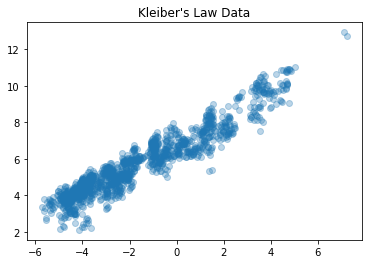

In [17]:
# Plot each point in the dataset
plt.scatter(x, y, alpha=0.3)
plt.title("Kleiber's Law Data")
plt.show()

Q5) [5 points] Use your gradient descent function to learn a linear regression model for the x and y above using the following parameters and plot the cost_history over the 1000 iterations

g = least_squares function you implemented

w = [w_0, w_1]  , where w_0 and w_1 are random numbers between -0.1 and 0.1

max_its=1000

alpha=0.01

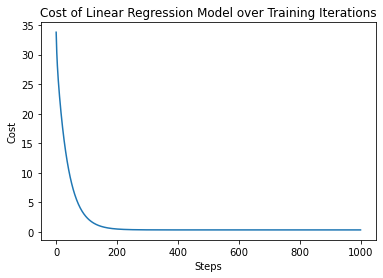

In [20]:
# Create weight matrix with randomized starting values between -0.1 and 0.1
w = np.array([np.random.uniform(-0.1, 0.1), np.random.uniform(-0.1, 0.1)])

# Constants
max_its = 1000
alpha = 0.01

# Deploy gradient descent
weight_history, cost_history = gradient_descent(least_squares, alpha, max_its, w, x, y)

# Plot cost as a function of step iteration
plt.plot(cost_history)
plt.xlabel("Steps"), plt.ylabel("Cost"), plt.title("Cost of Linear Regression Model over Training Iterations")
plt.show()

Q6) [5 points] Use the learned weights from above (note that the "learned" weights are the ones with the lowest cost) to plot the learned line. You can use the linspace method (shown below) to generate a list of xs that you can use for plotting. You need to generate a y for each of the candidate xs using the learned weights. On the same figure, also plot the scatter plot from Q4. 


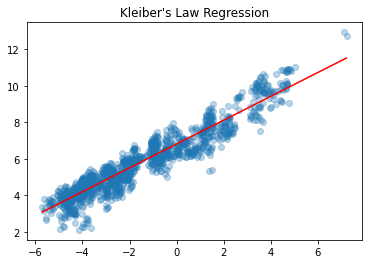

In [19]:
# Get sample x values for testing
s = np.linspace(np.min(x),np.max(x))
s_compat = np.reshape(s, (1, len(s)))

# Get the most recently trained weights with the lowest cost
learned_weights = weight_history[-1]

# Get predicted y values
y_pred = model(s_compat, learned_weights)

# Plot datapoints
plt.scatter(x, y, alpha=0.3)
# Plot regression line
plt.plot(s_compat[0], y_pred, color="red")
plt.title("Kleiber's Law Regression")
plt.show()

Q7) [1 points]  Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y). 

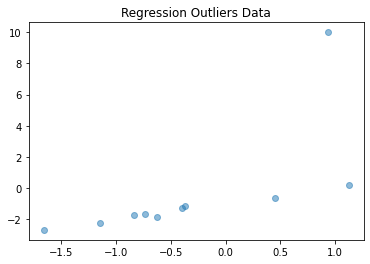

In [107]:
# Load in dataset
data = np.loadtxt('regression_outliers.csv',delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# Plot the datapoints
plt.scatter(x, y, alpha=0.5)
plt.title("Regression Outliers Data")
plt.show()

Q8) [10 ponts] Implement the least absolute deviations function discussed in class. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented in Q1  and return a float indicating the total cost.

In [109]:
# Least absolute deviations function
def least_absolute_deviations(w,x,y):
    
    # Get predicted y values
    y_predicted = model(x,w)
    # Get the difference between actual outputs and predicted outputs
    difference = np.subtract(y, y_predicted)
    # Calculate the mean absolute deviation
    cost = np.mean(np.absolute(difference))
    
    # Return cost
    return cost

Q9) [5 points] Use the gradient descent function twice to learn two linear models using the new x and y from Q7 using the following parameters and plot the cost_history for both runs on the same plot. Make the plot for the first run blue and the plot for the second run red.

Run 1) 
g = least_squares function

w = [1.0,1.0]

max_its=100

alpha=0.1

Run 2) 
g = least_absoulte_deviations

w = [1.0,1.0]

max_its=100

alpha=0.1


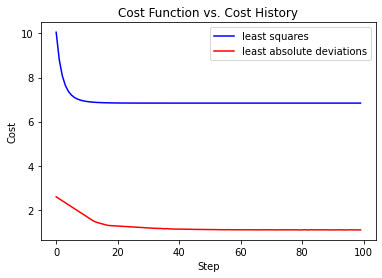

In [110]:
# Constants
w = np.array([1.0, 1.0])
max_its = 100
alpha = 0.1

# Run 1: least squares
wh1, ch1 = gradient_descent(least_squares, alpha, max_its, w, x, y)

# Run 2: least absolute deviations
wh2, ch2 = gradient_descent(least_absolute_deviations, alpha, max_its, w, x, y)

# Plot cost versus step for each function
plt.plot(ch1, color="blue", label="least squares")
plt.plot(ch2, color="red", label="least absolute deviations")
plt.xlabel("Step"), plt.ylabel("Cost"), plt.title("Cost Function vs. Cost History")
plt.legend()
plt.show()

Q10) [5 points] Use the learned weights from above to plot the two learned lines (use same colors as above). You can use the linspace method again to generate a list of xs that you can use. On the same figure, also plot the scatter plot from Q7. Which of these lines look like a better fit to you? 


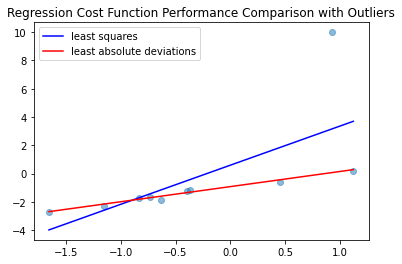

In [111]:
# Get sample x values for testing
s = np.linspace(np.min(x),np.max(x))
s_compat = np.reshape(s, (1, len(s)))

# Get the trained weights for each model
lw1, lw2 = wh1[-1], wh2[-1]

# Calculate predicted ys using learned weights for each model
yp1, yp2 = model(s_compat, lw1), model(s_compat, lw2)

# Plot datapoints
plt.scatter(x, y, alpha=0.5)
# Plot regression lines
plt.plot(s_compat[0], yp1, color="blue", label="least squares")
plt.plot(s_compat[0], yp2, color="red", label="least absolute deviations")
plt.title("Regression Cost Function Performance Comparison with Outliers")
plt.legend()
plt.show()

The regression line formed by the least absolute deviations function is a better fit for the data because it is significantly less skewed by the one outlier in our dataset. The regression line formed by the least squares function, on the other hand, does not fit the data as well since it is more susceptible to fluctuations caused by outliers.

Q11) [6 points] Implement the mean squared error (MSE) and the mean absolute deviation functions from class. The functions should take in as input an array of actual ys and an array of predicted ys and return the prediction error.

In [54]:
# Mean squared error
def MSE(y_actual,y_pred):
    
    # Get the difference between actual outputs and predicted outputs
    difference = np.subtract(y_pred, y_actual)
    # Calculate mean squared error
    error = np.mean(np.square(difference))
    
    # Return error
    return error

# Mean absolute deviation
def MAD(y_actual,y_pred):
    
    # Get the difference between actual outputs and predicted outputs
    difference = np.subtract(y_pred, y_actual)
    # Calculate mean absolute deviation
    error = np.mean(np.absolute(difference))
    
    # Return error
    return error

Q12) [4 points] Use the functions above to report the MSE and MAD for the two models learned in Q9, using the x and y from Q7. You should have 4 values total, two for each model. Which model is doing better? (Note that since you are evaluating the model on the training data, this corresponds to the training error)

In [112]:
# Get predicted y values given learned weights for least squares and least absolute deviations models
y_pred_1, y_pred_2 = model(x, lw1), model(x, lw2)

# Assess the least squares model
MSE1 = MSE(y, y_pred_1)
MAD1 = MAD(y, y_pred_1)

print("The mean squared error of the least squares model is: \n", str(MSE1))
print("The mean absolute deviations error of the least squares model is: \n", str(MAD1))

# Assess the least absolute deviations model
MSE2 = MSE(y, y_pred_2)
MAD2 = MAD(y, y_pred_2)

print("The mean squared error of the least absolute deviations model is: \n", str(MSE2))
print("The mean absolute deviations error of the least absolute deviations model is: \n", str(MAD2))

The mean squared error of the least squares model is: 
 6.84139430067187
The mean absolute deviations error of the least squares model is: 
 1.6893703656370611
The mean squared error of the least absolute deviations model is: 
 9.85171705201565
The mean absolute deviations error of the least absolute deviations model is: 
 1.0924206937396541


Different functions for calculating error tell different stories about which model – the least squares model or the least absolute devisions model – is performing better. According to the mean squared error, the least squares model is performing better (E = 6.84) than the least absolute deviations model (E = 9.85). However, when we calculate error using mean absolute deviations, we find that the least absolute deviations model (E = 1.09) is performing better than the least squares model (E = 1.69).

Q13) [6 points] Implement the L1 and L2 regularizers from class. Recall the regularizers take in input the weight vector and return a score based on the L1 or L2 norm of the weights

In [72]:
# L2 regularizer
def L2_regularizer(w):
    
    # L2 norm of weights
    # Square each weight and sum those values
    L2 = np.sum(np.square(w))
    
    # Return L2 score
    return L2

# L1 regularizer
def L1_regularizer(w):
    
    # L1 norm of weights
    # Take the absolute value of each weight and sum those values
    L1 = np.sum(np.absolute(w))
    
    # Return L1 score
    return L1

Q14) [12 points] Turn the least squares function implemented in Q2 into the Ridge (L2) and Lasso (L1) least squares (covered in class) using the functions implemented in Q13. Recall that $\lambda$ is used as a hyperparameter to specify the smoothness of the function learned (higher $\lambda$ leads to simpler and smoother functions whereas lower $\lambda$ leads to better fitting to the data. $\lambda=0$ is the same as non-regularized least-squares)

In [134]:
# Ridge least squares
def ridge(w,x,y,lmbda):    
    
    # Calculate cost as regularized mean squared error
    return least_squares(w,x,y) + lmbda * L2_regularizer(w)

# Lasso least squares
def lasso(w,x,y,lmbda):    
    
    # Calculate cost as regularized mean squared error
    return least_squares(w,x,y) + lmbda * L1_score


# The rest of the questions are for bonus points, but highly recommended

Q15) [2 points] The file 'weatherHistory.csv'has 96,454 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [122]:
# Read CSV into dataframe
weather_history = pd.read_csv("weatherHistory.csv")
weather_history

,Date,Summary,Precip,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


Q16) [5 points] Use the data above to set y to be the temperatures and X to be the following columns (in order): [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure] Basically, we want to see whether we can predict the temperature, using the features in X.

In [123]:
# Isolate the feature that we want to predict
y = weather_history["Temperature"]
# Capture the features that we want to use to predict Y
x = weather_history[["Apparent_Temperature", "Humidity", "Wind_Speed", "Wind_Bearing", "Visibility", "Pressure"]]

We are now going to using a well-known ML library called sklearn. If you do not have it installed, please do so using this instruction: https://scikit-learn.org/stable/install.html

sklearn comes with many models already implemented, below we import the standard linear regression, Ridge, and Lasso models from sklearn. We also import a method that can divide our data into train/test sets. Please run the cell below.

In [127]:
# Dependencies
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

This library is very easy to use. We briefly went over it in the class but please use the API and user guide  ( https://scikit-learn.org) to learn exactly how to use this library.

For instance, learning a linear regression model using sklearn can be done in two lines:

linearModel = LinearRegression() 

linearModel.fit(x_train, y_train)

Q17) [2 points] Use the train_test_split to divide your modified data from Q16 into 80% train, 20% test. 

In [125]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

Q18) [10 points] Use sklearn to train a LinearRegression model using the data above. Report the performance of the model on the test data (use sklearn's MSE implementation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). Note that the .predict method can be used to get the y_predictions for the test xs.

In [128]:
# Build regression model
regression = LinearRegression()
# Train the model using our training data
regression.fit(x_train, y_train)
# Get predicted y values
y_predicted = regression.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))

Mean squared error: 0.91


Q19) [10 points] Repeat Q18 but instead of LinearRegression, use the Ridge and Lasso functions. You can keep the default alpha (note that what we called lambda in the class, the hyperparameter for regularization, is called alpha in sklearn. It is the same thing).

In [133]:
# Build ridge model
ridge = Ridge()
# Train the model using our training data
ridge.fit(x_train, y_train)
# Get predicted y values
y_predicted = ridge.predict(x_test)

print("Ridge MSE: %.2f" % mean_squared_error(y_test, y_predicted))

# Build lasso model
lasso = Lasso()
# Train the model using our training data
lasso.fit(x_train, y_train)
# Get predicted y values
y_predicted = lasso.predict(x_test)

print("Lasso MSE: %.2f" % mean_squared_error(y_test, y_predicted))

Ridge MSE: 0.91
Lasso MSE: 0.98


Q20) [4 points] Print the learned parameters for the Ridge and Lasso models (using .coef_).  Note that the parameters below correspond to the feature vector ( [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure]), in order. I.e., the first value corresponds to "Apparent_Temperature", etc. What is the difference between the ridge and lasso parameters? Which features, if any, have been eliminated by lasso?

In [131]:
# Print weights for each model
print("Ridge coefficients: \n", ridge.coef_)
print("Lasso coefficients: \n", lasso.coef_)

Ridge coefficients: 
 [ 8.72677479e-01 -1.42240120e+00  8.00506168e-02 -4.09801810e-04
  8.48657159e-03 -2.03611370e-04]
Lasso coefficients: 
 [ 8.80466574e-01 -0.00000000e+00  6.91694502e-02 -2.56422810e-04
  0.00000000e+00 -1.56046509e-04]


The ridge parameters elicit a mean squared error of 0.91 while the lasso parameters generate a mean squared error of 0.98. The main difference between the two – aside from marginal differences in the coefficients for Apparent_Temperature, Wind_Speed, Wind_Bearing, and Pressure – is that the lasso regression eliminates the features Humidity and Visibility because they do not have enough predictive power to warrant non-zero coefficients. 